In [2]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census.csv")

In [3]:
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
target_column = "class"
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [34]:
adult_census.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

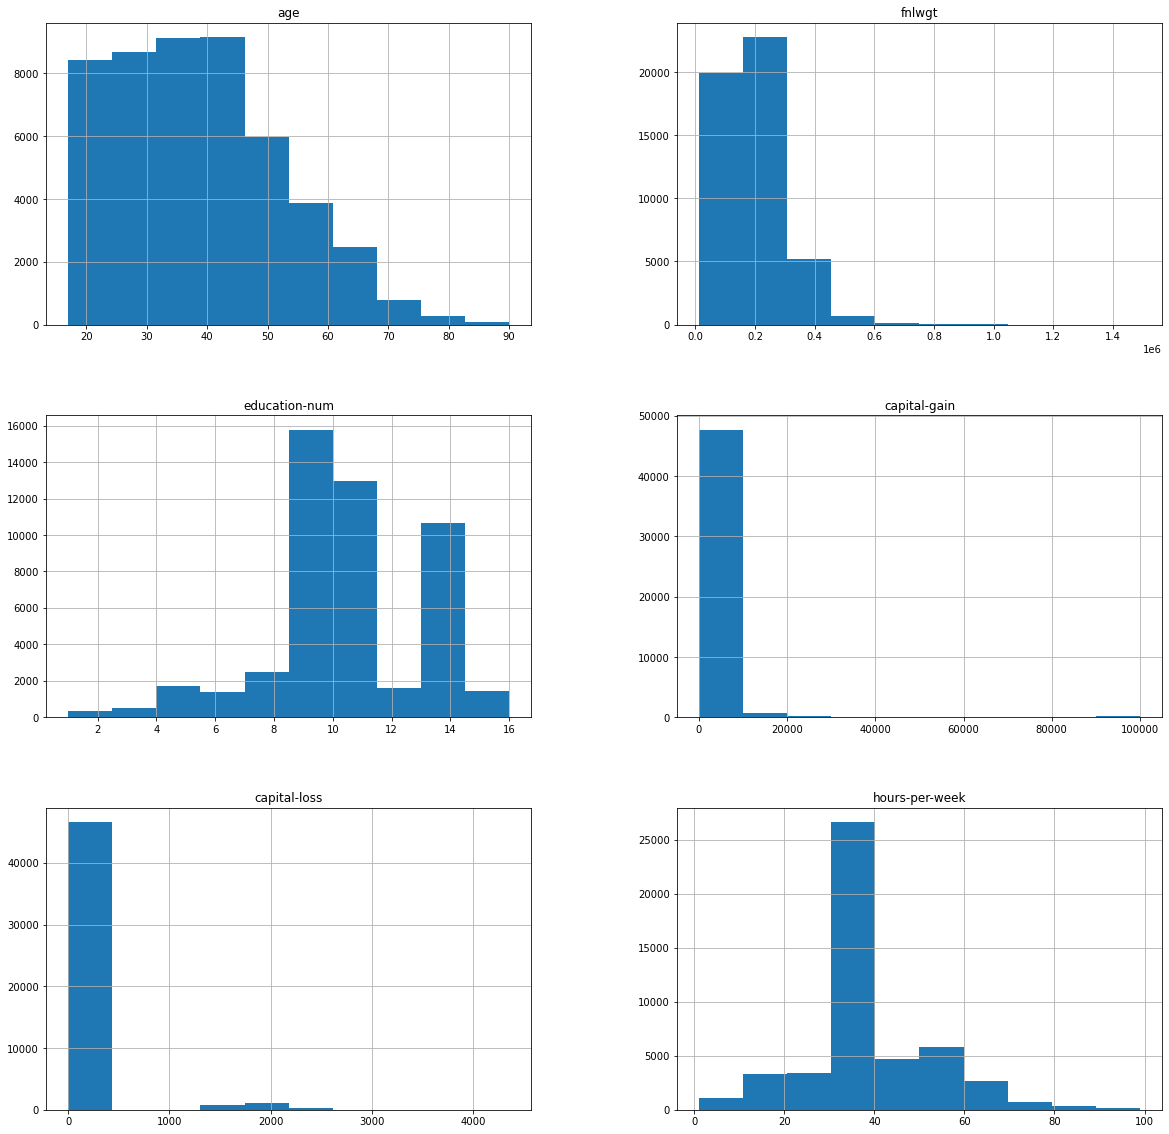

In [21]:
import matplotlib
_ = adult_census.hist(figsize=(20,20))

In [22]:
numerical_columns = [
    "age", "education-num", "capital-gain", "capital-loss",
    "hours-per-week"]
categorical_columns = [
    "workclass", "education", "marital-status", "occupation",
    "relationship", "race", "sex", "native-country"]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

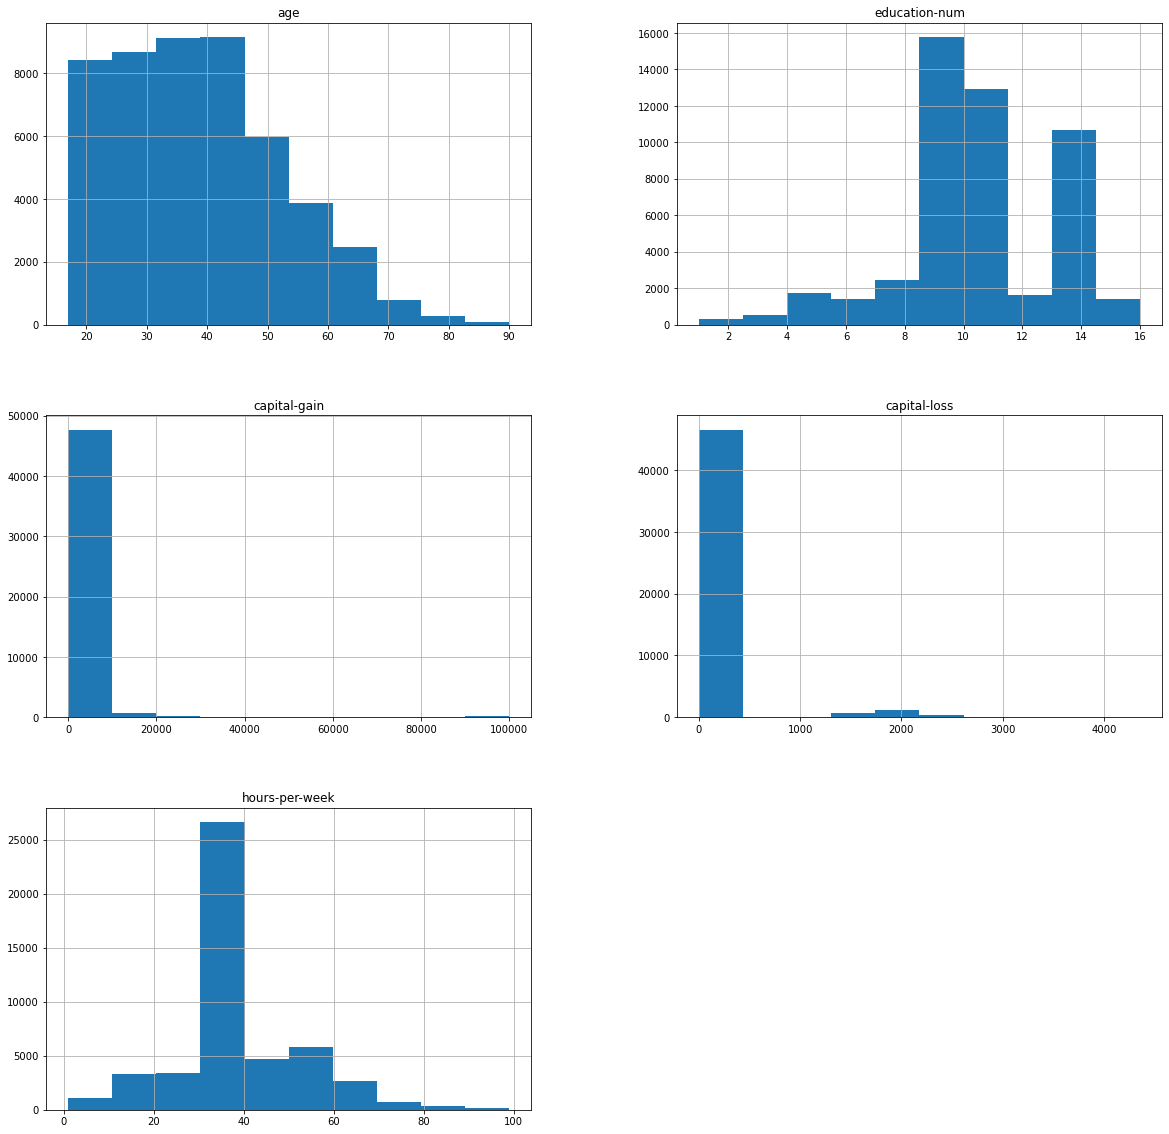

In [24]:
_ = adult_census.hist(figsize=(20,20))

In [25]:
adult_census["sex"].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [26]:
adult_census["education"].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [28]:
pd.crosstab(index=adult_census["education"], columns=adult_census["education-num"])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


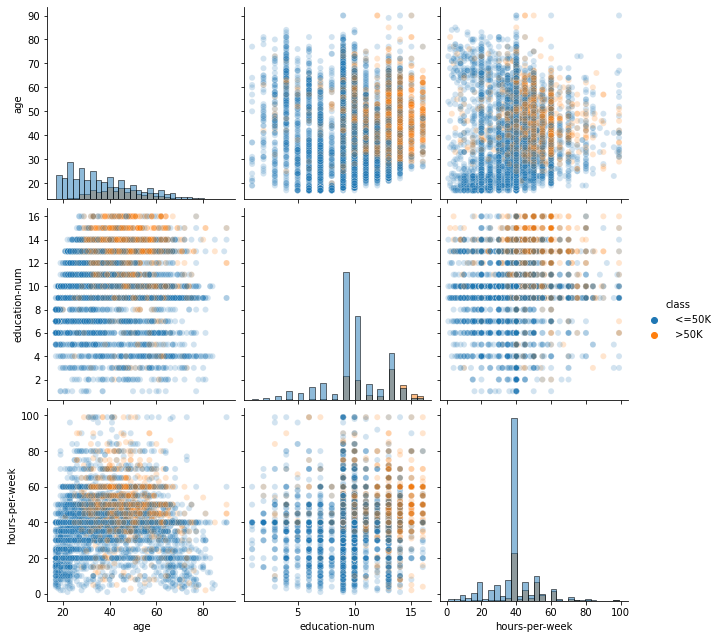

In [31]:
import seaborn as sns

# We will plot a subset of the data to keep the plot readable and make the
# plotting faster
n_samples_to_plot = 10000
columns = ["age", "education-num", "hours-per-week"]
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

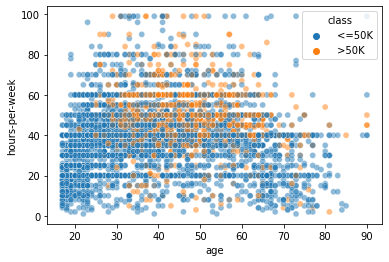

In [32]:
_ = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue="class",
    alpha=0.5,
)

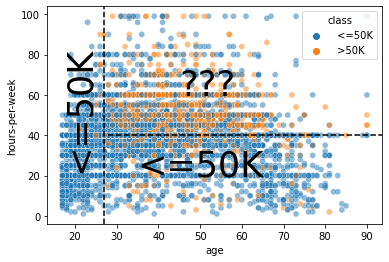

In [33]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age",
    y="hours-per-week",
    data=adult_census[:n_samples_to_plot],
    hue="class",
    alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

In [46]:
census_numeric = pd.read_csv(("../datasets/census_numeric.csv"))
target_name = "class"
target = census_numeric[target_name]
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [50]:
dataset = adult_census.drop(columns=categorical_columns)
dataset = dataset.drop(columns=[target_column, ])
dataset.head()


,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


In [51]:
dataset.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [52]:
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [53]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(dataset, target)

KNeighborsClassifier()

In [54]:
target_predicted = model.predict(dataset)

In [55]:
target_predicted[:5]

array([' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K'], dtype=object)

In [56]:
target[:5]

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: class, dtype: object

In [57]:
target[:5] == target_predicted[:5]

0     True
1     True
2    False
3     True
4     True
Name: class, dtype: bool

In [60]:
(target == target_predicted).mean()

0.8479791982310306

In [61]:
type(target_predicted)

numpy.ndarray

In [62]:
type(target)

pandas.core.series.Series

In [63]:
target == target_predicted

0         True
1         True
2        False
3         True
4         True
         ...  
48837     True
48838    False
48839     True
48840     True
48841     True
Name: class, Length: 48842, dtype: bool

In [64]:
dataset.shape

(48842, 5)

In [65]:
training = dataset.head(30000)

In [66]:
training.shape

(30000, 5)

In [67]:
test = dataset.tail(18842)

In [68]:
test.shape

(18842, 5)

In [69]:
test.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
30000,24,10,0,0,40
30001,51,9,0,0,40
30002,31,9,0,0,40
30003,45,13,0,1977,40
30004,36,10,0,0,40


In [70]:
training.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


In [75]:
target_training = target.head(30000)

In [76]:
target_test = target.tail(18842)

In [77]:
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram')

model = KNeighborsClassifier()
model.fit(training, target_training)

KNeighborsClassifier()

In [78]:
target_predicted = model.predict(test)

In [84]:
(target_test == target_predicted).sum() / target_test.shape[0]

0.8269822736439868

In [86]:
accuracy = model.score(test, target_test)
model_name = model.__class__.__name__
print(f"The test accuracy using a {model_name} is "
      f"{accuracy:.3f}")

The test accuracy using a KNeighborsClassifier is 0.827
